# Introduction to machine learning exercise along with Decision Tree model using the dataset from the previous class (music.csv), complete the following tasks

### Import the dataset and name the dataframe music_type

In [1]:
import pandas as pd
music_type = pd.read_csv("music.csv")

#### Inspect the dataset using display() and info(). This is always the first thing to do when you load a dataset

In [3]:
display(music_type)

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [4]:
music_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


## I need to change the observations in the Gender column from 0 and 1 to Male and Female.

#### I have created a function to help you compare each observation and convert it to the corresponding new value. The function assigns Male to all 1 observation and Female to all 0 observation.

#### Helper function

In [5]:
def new_Gender(music_type):
    if music_type["gender"] == 1:
        result = "Male"
    elif music_type["gender"] == 0:
        result = "Female"
    return result

### Complete the code below to Create a new column called Gender that will hold new column observations in the dataframe. Notice the difference in column names: gender vs Gender

#### Using the apply() method in pandas to easily achieve this. 

In [6]:
music_type["Gender"] = music_type.apply(new_Gender, axis = "columns")
music_type

,age,gender,genre,Gender
0,20,1,HipHop,Male
1,23,1,HipHop,Male
2,25,1,HipHop,Male
3,26,1,Jazz,Male
4,29,1,Jazz,Male
5,30,1,Jazz,Male
6,31,1,Classical,Male
7,33,1,Classical,Male
8,37,1,Classical,Male
9,20,0,Dance,Female


#### Remove the unwanted (gender) column and reorder the columns so that the Gender column will be the first followed by age

In [7]:
music_type = music_type.drop(columns = ["gender"])
music_type = music_type[["Gender","age","genre"]]
music_type

,Gender,age,genre
0,Male,20,HipHop
1,Male,23,HipHop
2,Male,25,HipHop
3,Male,26,Jazz
4,Male,29,Jazz
5,Male,30,Jazz
6,Male,31,Classical
7,Male,33,Classical
8,Male,37,Classical
9,Female,20,Dance


#### Split the dataset into predictor as X and predicted as y variables using your intuition to decide the appropriate variables

In [8]:
X = music_type[["Gender","age"]]
y = music_type["genre"]

#### Because algorithm does not work well with string data types as predictor variables, convert all predictor variables from string data types to dummy variables

In [9]:
X = pd.get_dummies(X)

## Building the machine learning algorithm

#### Import the Decision Tree library

In [10]:
from sklearn.tree import DecisionTreeClassifier

#### Create an object from the DTree classifier class (Make use of the DTree classifier)

In [11]:
model = DecisionTreeClassifier()

#### Train your model

In [12]:
model.fit(X,y)

DecisionTreeClassifier()

#### Helper function

In [13]:
def prediction_transform(age, gender):
    transform = []
    if gender.lower() == "male":
        transform.append([age,0,1])
    elif gender.lower() == "female":
        transform.append([age,1,0])
    return transform

### Predict the type of music a 27 year old Female likes

I have created a function that will allow you enter the predictor variables directly into the model prediction without errors

Notice that Age comes first in the dataset so enter the age then followed by gender

In [14]:
pred = model.predict(prediction_transform(27,"female"))

#### Plot the confusion matrix of the model

In [15]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

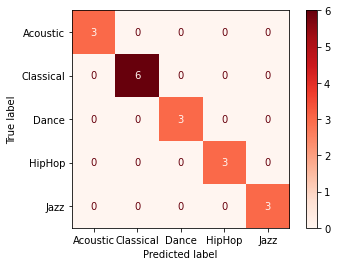

In [17]:
plot_confusion_matrix(model,X,y,cmap = plt.cm.Reds)
plt.show()

#### Thank You